In [ ]:
import pandas as pd
import spacy
from sklearn.metrics import make_scorer, classification_report, make_scorer, recall_score, f1_score, accuracy_score, confusion_matrix
df = pd.read_excel('../data/avis/general_df_clean_sent_15k_manual_code.xlsx')

nlp = spacy.load("fr_core_news_lg")
df.head()

In [ ]:
theme_frais= [row['text_avis'] for index, row in df.iterrows() if pd.notna(row['var_frais'])]
theme_efficacite = [row['text_avis'] for index, row in df.iterrows() if pd.notna(row['var_efficacité'])]
theme_discrimination = [row['text_avis'] for index, row in df.iterrows() if pd.notna(row['var_discrimination'])]
theme_protexction = [row['text_avis'] for index, row in df.iterrows() if pd.notna(row['var_protection'])]
theme_cloture = [row['text_avis'] for index, row in df.iterrows() if pd.notna(row['var_clôture'])]
theme_prets = [row['text_avis'] for index, row in df.iterrows() if pd.notna(row['var_prêts'])]
theme_virements = [row['text_avis'] for index, row in df.iterrows() if pd.notna(row['var_virements'])]
theme_communication = [row['text_avis'] for index, row in df.iterrows() if pd.notna(row['var_communication'])]


In [ ]:
nuggets_efficacité = pd.read_excel("../data/avis/general_df_clean_sent_15k_manual_code.xlsx",
                                   sheet_name = "curation_efficacité", index_col= 0)
nuggets_efficacité.head(1)

In [ ]:
# tout
list_exemples_tout = df.text_avis

# efficace 
list_exemples_efficace = nuggets_efficacité.curated_efficace
list_exemples_efficace = list_exemples_efficace.dropna()
bag_efficace = " ".join([message for message in list_exemples_efficace])

# innefficace
list_exemples_innefficace = nuggets_efficacité.curated_inneficace
list_exemples_innefficace = list_exemples_innefficace.dropna()
bag_innefficace = " ".join([message for message in list_exemples_innefficace])
bag_innefficace_nlp =nlp(bag_innefficace)


In [ ]:
# fonctions et liste de seuils de similarité à tester

import numpy as np
test_thresh = np.arange(0.59,1.01, 0.01)
#thresh_bench = pd.DataFrame(columns=["thresh", "f1-score"])
f1_scores = []

def allocate_lab(sim_score, y_pred, sim_thresh):
    if max(sim_score) > sim_thresh:
        y_pred.append(1)
    else:
        y_pred.append(0)

def similarity_report(y,y_pred):
    report =classification_report(y, y_pred, output_dict=True)  
    macro_f1 = round(report['macro avg']['f1-score'],2)
    #print(report)
    f1_scores.append(macro_f1)


In [ ]:
# [message] to [bag of exemples] ->> f1 =0.7 avec thresh de 0.84
f1_scores = []

for thresh in test_thresh:
    y_pred = []
    for message in list_exemples_tout:
        sim_score = []
        #print("message entier : ",message)
        message = nlp(message)
        sim_score.append(round(bag_innefficace_nlp.similarity(message),2))
        #print(sim_score)
        #print("-------------")
        allocate_lab(sim_score,y_pred,thresh)
    similarity_report(y,y_pred)
best_score = max(f1_scores)
best_thresh = test_thresh[f1_scores.index(best_score)]
print(f"best score: {best_score} using similarity thresh of {best_thresh}")

In [ ]:
# [sentence of messages] vs [bag of exemples] --> score f1 : 0.73 avec thresh de 0.84
f1_scores = []

for thresh in test_thresh:
    y_pred = []
    for message in list_exemples_tout:
        sim_score= []
        #print("message entier : ",message)
        message = nlp(message)
        sentences = message.sents
        for sentence in sentences:
            #print("phrase: ",sentence)
            temp_sim_score = round(bag_innefficace_nlp.similarity(sentence),2)
            #print(temp_sim_score)
            sim_score.append(temp_sim_score)
        #print("-------------")
        allocate_lab(sim_score,y_pred,thresh)
    similarity_report(y,y_pred)

best_score = max(f1_scores)
best_thresh = test_thresh[f1_scores.index(best_score)]
print(f"best score: {best_score} using similarity thresh of {best_thresh}")

In [227]:
df.head(2)

,Unnamed: 0,user,etoiles,n_avis,date_avis,date_experience,Société,text_total,jour_avis,mois_avis,...,heure_experience,annee_experience,periode_avis,longueur_texte,text_stop,text_lemma,label,score,sentiment_norm,var_bad:inefficace
5529,5529,Benjamin Danneville,5,1.0,2021-04-26,2021-04-26,Shine,Permet de faire des factures et des…Permet de ...,26,4,...,0,2021,nuit,95,Permet faire factures … Permet faire factures ...,permettre faire facture … permettre faire fact...,1,0.804014,0.804014,0
57109,120764,Gillot Frederic,5,1.0,2022-01-16,2022-01-16,Immoprt,"Bien accompagnéBien accompagné, sympathique, p...",16,1,...,0,2022,nuit,73,"Bien accompagnéBien accompagné , sympathique ,...","bien accompagnébien accompagner , sympathique ...",1,0.974431,0.974431,0


In [ ]:
# [sentence of messages] vs [étalon] --> f1 .57 avec seuil de 0.59
f1_scores = []

for thresh in test_thresh:
    y_pred = []
    for message in list_exemples_tout:
        sim_score= []
        #print("message entier : ",message)
        message = nlp(message)
        sentences = message.sents
        for sentence in sentences:
            #print("phrase: ",sentence)
            temp_sim_score = round(étalon.similarity(sentence),2)
            #print(temp_sim_score)
            sim_score.append(temp_sim_score)
        #print("-------------")
        allocate_lab(sim_score,y_pred,thresh)
    similarity_report(y,y_pred)

best_score = max(f1_scores)
best_thresh = test_thresh[f1_scores.index(best_score)]
print(f"best score: {best_score} using similarity thresh of {best_thresh}")

In [ ]:
best_score = max(f1_scores)
best_thresh = test_thresh[f1_scores.index(best_score)]
print(f"best score: {best_score} using similarity thresh of {best_thresh}")

In [ ]:
# [sentence of messages] vs [étalon] --> f1 .54 avec seuil de 0.59 
f1_scores = []

for thresh in test_thresh:
    y_pred = []
    for message in list_exemples_tout:
        sim_score = []
        #print("message entier : ",message)
        message = nlp(message)
        sim_score.append(round(étalon.similarity(message),2))
        #print(sim_score)
        #print("-------------")
        allocate_lab(sim_score,y_pred,thresh)
    similarity_report(y,y_pred)
best_score = max(f1_scores)
best_thresh = test_thresh[f1_scores.index(best_score)]
print(f"best score: {best_score} using similarity thresh of {best_thresh}")

In [ ]:
# [sentences of messages] vs [sentences of bag of exemples] -> f1-score of .84 avec seuil de 0.91
f1_scores = []

for thresh in test_thresh:
    y_pred = []
    for message in list_exemples_tout:
        sim_score= []
        #print("message entier : ",message)
        message = nlp(message)
        sentences = message.sents
        sentences_exemples = bag_innefficace_nlp.sents
        for sentence in sentences:
            for sentence_exemple in sentences_exemples:
                #print("phrase: ",sentence)
                temp_sim_score = round(sentence_exemple.similarity(sentence),2)
                #print(temp_sim_score)
                sim_score.append(temp_sim_score)
        #print("-------------")
        allocate_lab(sim_score,y_pred,thresh)
    similarity_report(y,y_pred)

best_score = max(f1_scores)
best_thresh = test_thresh[f1_scores.index(best_score)]
print(f"best score: {best_score} using similarity thresh of {best_thresh}")

In [ ]:
test= pd.read_excel("")

In [ ]:
# version sentence sans stopwords



In [ ]:
definition = "def"
exemples = "str concaténé des exemples"
defex = definition + " " + exemples

# boucle pour évaluer pour chaque theme les messages, puis les phrases dans chaque message

# boucle thèmes
for thème in df.themes:
	col_theme = "Q" + thème
	# boucle pour les messages
	for i, message in enumerate(train_df.text_total):
		message = nlp(message)
		message_sentence = sentence(message)
		sim_scores = []
		for sentence in message_sentence:
			sim = sentence.similarity(defex)
			sim_scores.append(sim)
		if sim_score.max() > 0.8:
			train_df.iloc[i,col_theme] = 1
			exerpt_col = col_theme + "exerpt"
			train_df.iloc[i,exerpt_col] = sentence[sim_scores.index(max(sim_scores))]
		else:
			train_df[col_theme] = 0
			exerpt_col = ""
 
	



In [187]:
#  TEST [sentences of messages] vs [sentences of bag of exemples] -> 0.72 using similarity thresh of 0.83
test = pd.read_excel("../data/avis/general_df_clean_sent_15k_manual_code.xlsx",
                                   sheet_name = "test", index_col= 0)
test_text = test.text_avis
y = test.var_efficacité_bad
test_messages = test.text_avis.dropna()

f1_scores = []

for thresh in test_thresh:
    y_pred = []
    for message in test_messages:
        sim_score= []
        #print("message entier : ",message)
        message = nlp(message)
        sentences = message.sents
        sentences_exemples = bag_innefficace_nlp.sents
        for sentence in sentences:
            for sentence_exemple in sentences_exemples:
                #print("phrase: ",sentence)
                temp_sim_score = round(sentence_exemple.similarity(sentence),2)
                #print(temp_sim_score)
                sim_score.append(temp_sim_score)
        #print("-------------")
        allocate_lab(sim_score,y_pred,thresh)
    similarity_report(y,y_pred)

best_score = max(f1_scores)
best_thresh = test_thresh[f1_scores.index(best_score)]
print(f"best score: {best_score} using similarity thresh of {best_thresh}")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

best score: 0.72 using similarity thresh of 0.8300000000000002


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [193]:
# essai sur l'ensemble de la base d'entrainement pour la variable inefficacité
import time
df = pd.read_csv("../data/avis/train_noYC_lemma_sent_equil.csv", index_col= 0)
df_messages = df.text_total

f1_scores = []
thresh = 0.83 # as per our grid search results

y_pred = []
round_count = 0
t0 = time.time()
for message in df_messages:
    round_count+=1
    sim_score= []
    #print("message entier : ",message)
    message = nlp(message)
    sentences = message.sents
    sentences_exemples = bag_innefficace_nlp.sents
    for sentence in sentences:
        for sentence_exemple in sentences_exemples:
            #print("phrase: ",sentence)
            temp_sim_score = round(sentence_exemple.similarity(sentence),2)
            #print(temp_sim_score)
            sim_score.append(temp_sim_score)
    #print("-------------")
    allocate_lab(sim_score,y_pred,thresh)
    if round_count % 100 == 0:
        print(round_count, " messages labelled")
t1 = time.time()
delais = round((t1-t0)/60,2)
df['var_bad:inefficace'] = y_pred

print(f"{delais} minutes to compete similarity labelling")
df['var_bad:inefficace'].value_counts()

/var/folders/7m/gxswx1js22x0hszgmzpd29qcg1657r/T/ipykernel_94625/363922720.py:22: UserWarning: [W008] Evaluating Span.similarity based on empty vectors.
  temp_sim_score = round(sentence_exemple.similarity(sentence),2)


100  messages labelled
200  messages labelled
300  messages labelled
400  messages labelled
500  messages labelled
600  messages labelled
700  messages labelled
800  messages labelled
900  messages labelled
1000  messages labelled
1100  messages labelled
1200  messages labelled
1300  messages labelled
1400  messages labelled
1500  messages labelled
1600  messages labelled
1700  messages labelled
1800  messages labelled
1900  messages labelled
2000  messages labelled
2100  messages labelled
2200  messages labelled
2300  messages labelled
2400  messages labelled
2500  messages labelled
2600  messages labelled
2700  messages labelled
2800  messages labelled
2900  messages labelled
3000  messages labelled
3100  messages labelled
3200  messages labelled
3300  messages labelled
3400  messages labelled
3500  messages labelled
3600  messages labelled
3700  messages labelled
3800  messages labelled
3900  messages labelled
4000  messages labelled
4100  messages labelled
4200  messages labelled
4

0    8310
1    2375
Name: var_bad:inefficace, dtype: int64

<Axes: xlabel='var_bad:inefficace', ylabel='count'>

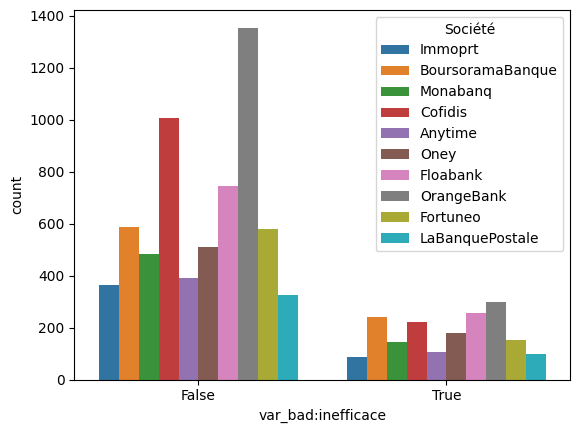

In [224]:
# top_bank topbank
list_top = [bank for bank in df.Société.value_counts().keys()[0:10]]
df_top = df[df['Société'].isin(list_top)]

import seaborn as sns

sns.countplot(x = df_top['var_bad:inefficace']== 1, hue = df_top.Société)

['OrangeBank',
 'Cofidis',
 'Floabank',
 'BoursoramaBanque',
 'Fortuneo',
 'Oney',
 'Monabanq',
 'Anytime',
 'Immoprt',
 'LaBanquePostale']

<Axes: xlabel='var_bad:inefficace', ylabel='count'>

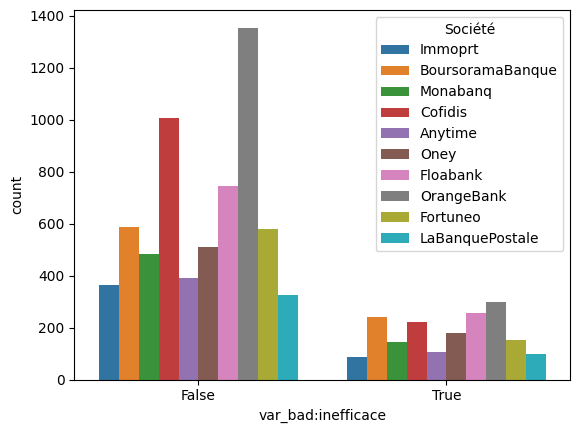